# Get different sentiment algorithms and compare them

In [1]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client.query_api_client import HelixirQueryApi

## Create api client

In [3]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirQueryApi(auth_token=AUTH_TOKEN, api_server="http://167.235.251.238:3000", api_version="dev")
client

In [4]:
sent1_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent1 = client.get_data_response(sent1_query)
sent1['time'] = pd.to_datetime(sent1['time'])
sent1.set_index('time')
sent1['sentiment'] = pd.to_numeric(sent1['sentiment'])
sent1['ewm'] = sent1['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent1

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.113150,2023-01-27 14:00:00+00:00,0.113150
1,0.585900,2023-01-27 15:00:00+00:00,0.199105
2,0.164656,2023-01-27 16:00:00+00:00,0.192841
3,-0.636900,2023-01-27 17:00:00+00:00,0.041979
4,-0.371067,2023-01-27 18:00:00+00:00,-0.033120
...,...,...,...
202,0.387975,2023-02-06 10:00:00+00:00,0.193151
203,-0.225000,2023-02-06 11:00:00+00:00,0.117123
204,0.262500,2023-02-06 12:00:00+00:00,0.143556
205,0.213817,2023-02-06 13:00:00+00:00,0.156330


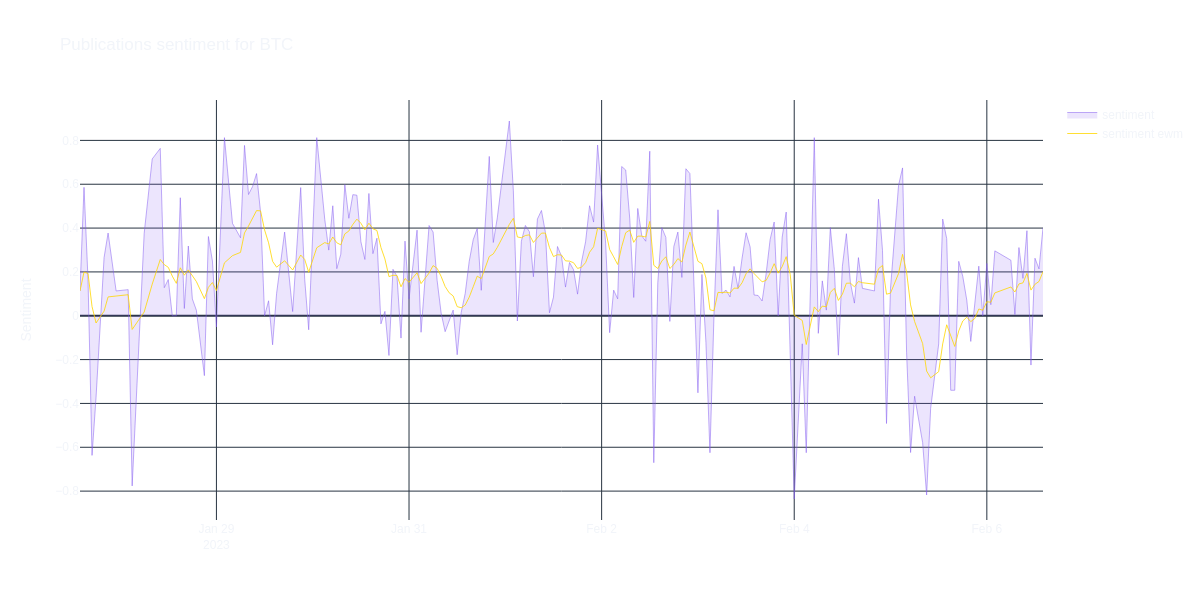

In [5]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent1['time'],
                         y=sent1['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [6]:
sent2_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_2) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent2 = client.get_data_response(sent2_query)
sent2['time'] = pd.to_datetime(sent2['time'])
sent2.set_index('time')
sent2['sentiment'] = pd.to_numeric(sent2['sentiment'])
sent2['ewm'] = sent2['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent2

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.000000,2023-01-27 14:00:00+00:00,0.000000
1,0.000000,2023-01-27 15:00:00+00:00,0.000000
2,0.000000,2023-01-27 16:00:00+00:00,0.000000
3,0.000000,2023-01-27 17:00:00+00:00,0.000000
4,0.000000,2023-01-27 18:00:00+00:00,0.000000
...,...,...,...
202,0.000000,2023-02-06 10:00:00+00:00,-0.003899
203,-0.338377,2023-02-06 11:00:00+00:00,-0.064713
204,0.000000,2023-02-06 12:00:00+00:00,-0.052947
205,-0.090670,2023-02-06 13:00:00+00:00,-0.059806


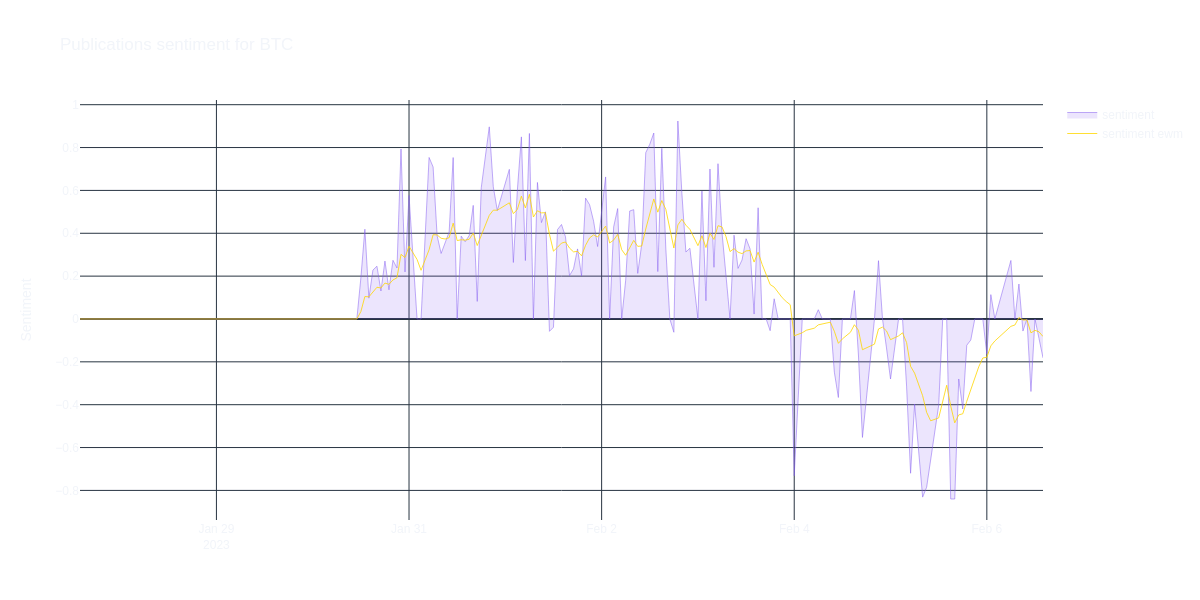

In [7]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent2['time'],
                         y=sent2['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [8]:
sent3_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_3) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent3 = client.get_data_response(sent3_query)
sent3['time'] = pd.to_datetime(sent3['time'])
sent3.set_index('time')
sent3['sentiment'] = pd.to_numeric(sent3['sentiment'])
sent3['ewm'] = sent3['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent3

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,NaN,2023-01-27 14:00:00+00:00,NaN
1,NaN,2023-01-27 15:00:00+00:00,NaN
2,NaN,2023-01-27 16:00:00+00:00,NaN
3,NaN,2023-01-27 17:00:00+00:00,NaN
4,NaN,2023-01-27 18:00:00+00:00,NaN
...,...,...,...
202,0.000000,2023-02-06 10:00:00+00:00,0.060920
203,0.000058,2023-02-06 11:00:00+00:00,0.049854
204,0.000000,2023-02-06 12:00:00+00:00,0.040790
205,-0.129483,2023-02-06 13:00:00+00:00,0.009831


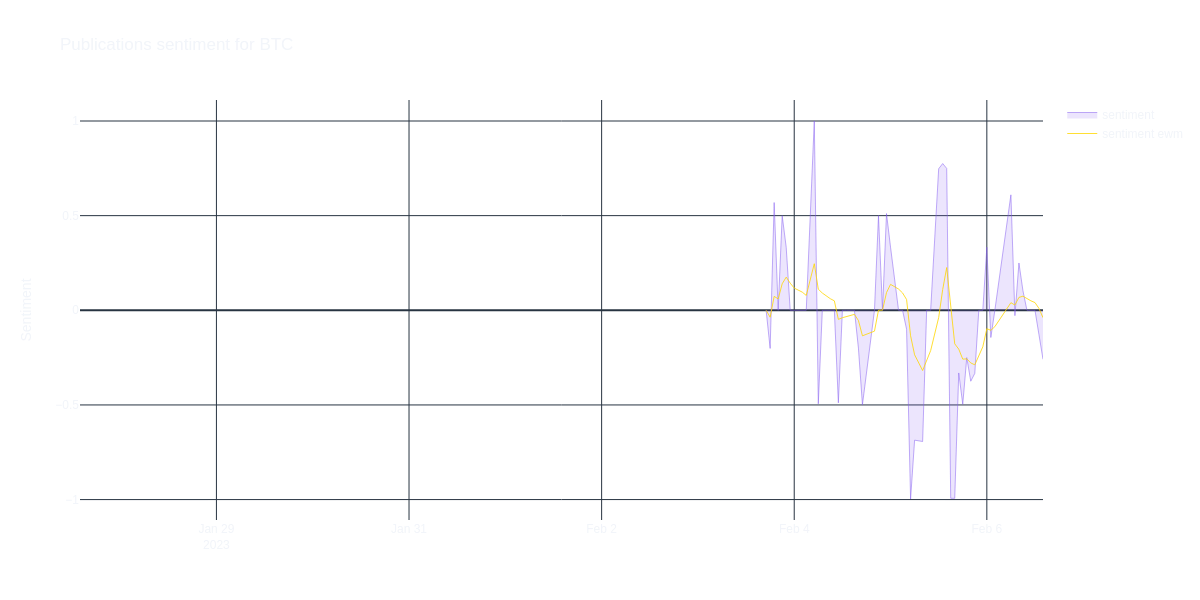

In [9]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent3['time'],
                         y=sent3['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

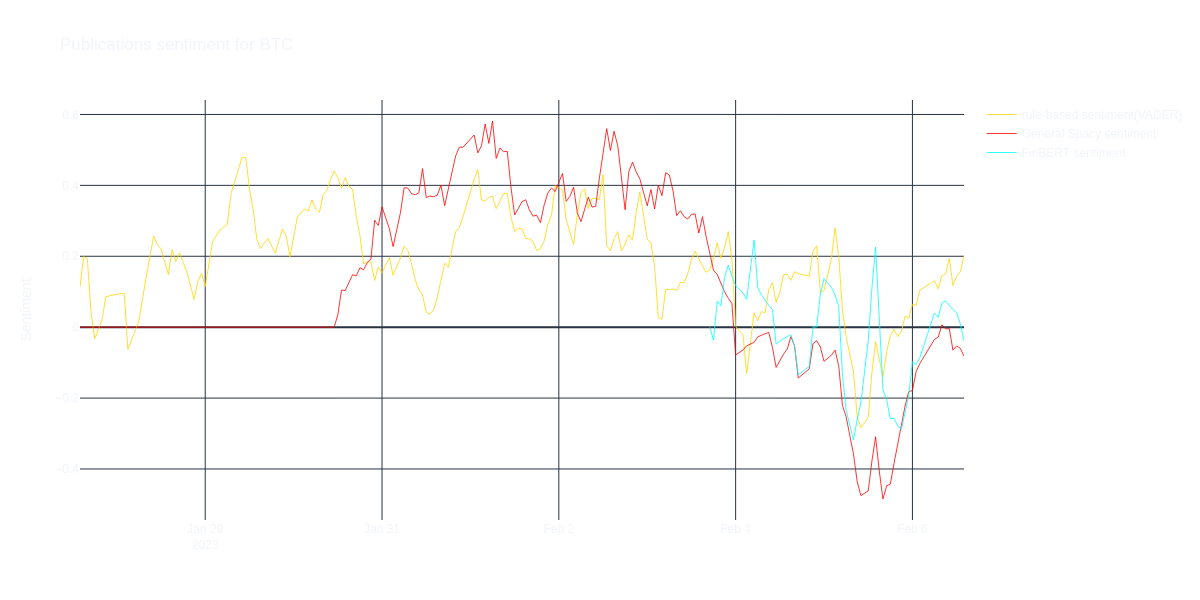

In [10]:
fig = make_subplots()

sentiment1_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="rule-based sentiment(VADER)",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

sentiment2_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="General Spacy sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='red')
                         )

sentiment3_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="FinBERT sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='cyan')
                         )

fig.add_trace(sentiment1_ewm)
fig.add_trace(sentiment2_ewm)
fig.add_trace(sentiment3_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [11]:
tohlcv_query = """SELECT p.bucket as time, open_stable, high_stable, low_stable, close_stable, v.volume
FROM series.chain_bsc.price_ticks_hourly p
         join series.chain_bsc.volume_ticks_hourly v
              on (p.bucket = v.bucket and p.token_id = v.token_id and p.platform_id = v.platform_id)
WHERE p.token_id = token('0x7130d2A12B9BCbFAe4f2634d864A1Ee1Ce3Ead9c')
  and p.platform_id = 1
  and p.bucket >= now() - interval '10' day
ORDER BY time;"""

tohlcv_resp = client.get_data_response(tohlcv_query)
tohlcv_resp['time'] = pd.to_datetime(tohlcv_resp['time'])
tohlcv_resp.set_index('time')
tohlcv_resp

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,close_stable,high_stable,low_stable,open_stable,time,volume
0,23003.618020126312,23040.62263989056,22973.18790273073,22978.846873029008,2023-01-27 15:00:00+00:00,6.2175457060860302
1,23098.273574563922,23100.72452481461,22975.90685328293,23000.38575382533,2023-01-27 16:00:00+00:00,3.0627194599848618
2,23226.291262468556,23226.291262468556,23118.88002544082,23118.88002544082,2023-01-27 17:00:00+00:00,5.4671404518924909
3,23168.186611803332,23232.994867708734,23133.089484760567,23225.036006019334,2023-01-27 18:00:00+00:00,6.6151724385363947
4,23224.631110277118,23245.84222375621,23168.0031966765,23168.007554024673,2023-01-27 19:00:00+00:00,2.3724972288590791
...,...,...,...,...,...,...
234,22926.735883085355,22950.09238630884,22879.627025239148,22927.783137974424,2023-02-06 09:00:00+00:00,6.5156037930657880
235,22867.036793972242,22927.194161437874,22866.548397440274,22925.51876340899,2023-02-06 10:00:00+00:00,6.4347893007994473
236,22890.918114855984,22890.918114855984,22829.542942903066,22866.965035851965,2023-02-06 11:00:00+00:00,5.7371007986274774
237,22916.594531736526,22961.592254605923,22898.80318608233,22898.80318608233,2023-02-06 12:00:00+00:00,2.9609145087876375


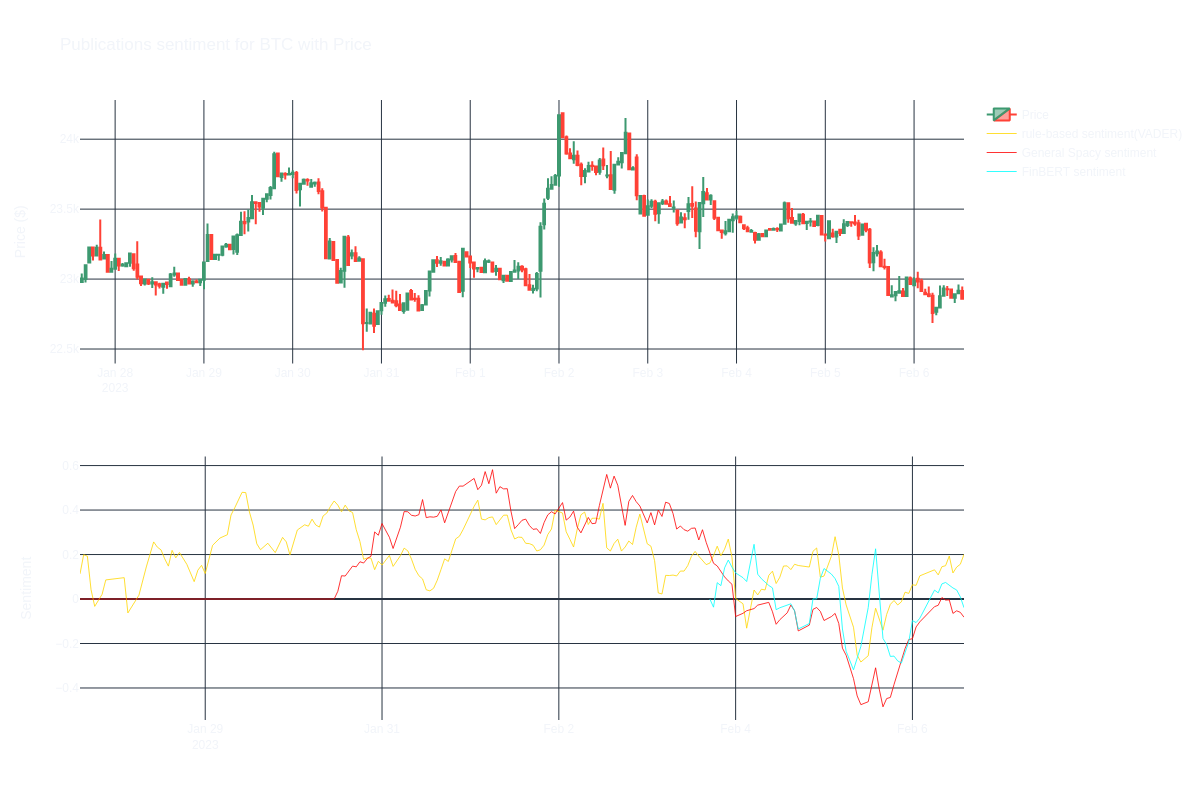

In [12]:
fig = make_subplots(rows=2, cols=1)

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open_stable'],
    high=tohlcv_resp['high_stable'],
    low=tohlcv_resp['low_stable'],
    close=tohlcv_resp['close_stable'],
    name="Price"
)

fig.add_trace(candlestick, row=1, col=1)
fig.add_trace(sentiment1_ewm, row=2, col=1)
fig.add_trace(sentiment2_ewm, row=2, col=1)
fig.add_trace(sentiment3_ewm, row=2, col=1)

fig.update_layout(
    width=1200, height=800,
    title="Publications sentiment for BTC with Price",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)

fig.show("png")